참고 : https://teddylee777.github.io/pytorch/custom-image-loader/#%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C-%EB%B0%8F-%EC%95%95%EC%B6%95-%ED%95%B4%EC%A0%9C

# New

In [1]:
import numpy as np 
"""
Numpy는 다차원 배열과 행렬 연산을 효율적으로 처리할 수 있는 라이브러리입니다.
이미지 데이터를 로드하고 전처리하는 데 사용됩니다.
PyTorch와의 호환성이 좋아 PyTorch 모델에 입력할 수 있는 형태로 데이터를 준비할 수 있습니다.
"""
import torch
"""
PyTorch는 딥러닝 모델 구현을 위한 대표적인 라이브러리입니다.
모델 정의, 학습, 추론 등의 작업을 수행할 때 사용됩니다.
Numpy 배열과 호환되어 데이터 전처리와 모델 학습을 연결할 수 있습니다.
"""
from torch.utils.data import Dataset, DataLoader
"""
torch.utils.data 의 Dataset은 데이터셋을 정의하고 관리하는 데 사용됩니다.
이미지 데이터와 같은 입력 데이터와 해당 레이블을 함께 관리할 수 있습니다.
데이터 로딩, 전처리, 배치 생성 등의 기능을 제공합니다.

DataLoader는 Dataset 클래스에서 정의한 데이터셋을 효율적으로 로드하고 배치 단위로 제공합니다.
데이터 증강, 셔플링, 멀티 프로세싱 등의 기능을 제공하여 모델 학습에 사용할 수 있는 데이터를 생성합니다.
"""
from torchvision import datasets, transforms
"""
torchvision의 datasets는 널리 사용되는 이미지 데이터셋(MNIST, CIFAR, ImageNet 등)을 제공합니다.
사용자가 직접 데이터를 수집하고 전처리하지 않아도 이러한 표준 데이터셋을 쉽게 사용할 수 있습니다.

torchvision의 transforms는 이미지 데이터에 대한 다양한 전처리 기능을 제공합니다.
크기 조정, 정규화, 데이터 증강 등의 작업을 수행할 수 있습니다.
모델 학습을 위해 데이터를 적절한 형태로 준비할 수 있습니다.
"""

'\ntorchvision의 datasets는 널리 사용되는 이미지 데이터셋(MNIST, CIFAR, ImageNet 등)을 제공합니다.\n사용자가 직접 데이터를 수집하고 전처리하지 않아도 이러한 표준 데이터셋을 쉽게 사용할 수 있습니다.\n\ntorchvision의 transforms는 이미지 데이터에 대한 다양한 전처리 기능을 제공합니다.\n크기 조정, 정규화, 데이터 증강 등의 작업을 수행할 수 있습니다.\n모델 학습을 위해 데이터를 적절한 형태로 준비할 수 있습니다.\n'

In [28]:
# 이미지 데이터셋 다운로드
import urllib.request
"""이 모듈은 인터넷에서 데이터를 다운로드하는 데 사용됩니다.
원격 이미지 데이터셋을 다운로드하거나, 웹 상의 리소스를 가져오는 데 사용할 수 있습니다."""
import zipfile
"""이 모듈은 zip 파일을 압축 해제하는 데 사용됩니다.
이미지 데이터셋이 zip 파일로 제공되는 경우, 이 모듈을 사용하여 데이터를 추출할 수 있습니다."""
import glob
"""이 모듈은 파일 경로 패턴을 사용하여 파일 목록을 가져오는 데 사용됩니다.
데이터셋의 이미지 파일들을 효율적으로 찾아 처리하는 데 도움이 됩니다."""
import os
"""이 모듈은 운영 체제 관련 기능을 제공합니다.
파일 및 디렉토리 작업, 환경 변수 관리 등의 작업을 수행할 수 있습니다.
데이터셋 파일 경로 관리, 임시 디렉토리 생성 등에 사용됩니다."""
import random
"""이 모듈은 난수 생성 기능을 제공합니다.
데이터 셔플링, 데이터 증강 등의 작업에 사용될 수 있습니다.
실험의 재현성을 위해 SEED 값을 설정합니다."""
from PIL import Image, UnidentifiedImageError,ImageFile
"""
PIL 라이브러리는 이미지 처리를 위한 다양한 기능을 제공합니다.
이미지 로딩, 크기 조정, 회전, 자르기 등의 작업을 수행할 수 있습니다.
이미지 데이터를 전처리하고 모델에 적합한 형태로 변환하는 데 사용됩니다.
"""
"""UnidentifiedImageError모듈은 이미지 파일 처리 과정에서 발생할 수 있는 오류를 처리하는 데 사용됩니다.
손상되거나 지원되지 않는 이미지 파일을 처리할 때 발생할 수 있는 문제를 해결하는 데 도움이 됩니다."""

SEED = 123

In [29]:
# 데이터셋을 다운로드 합니다.
url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
urllib.request.urlretrieve(url, 'cats_and_dogs.zip')

('cats_and_dogs.zip', <http.client.HTTPMessage at 0x7a9f9a217cd0>)

In [30]:
# 다운로드 후 tmp 폴더에 압축을 해제 합니다.
local_zip = 'cats_and_dogs.zip'  # 압축된 데이터셋 파일의 경로를 변수에 저장
zip_ref = zipfile.ZipFile(local_zip, 'r')  # 압축 파일을 읽기 모드로 열어 zip_ref 객체 생성
zip_ref.extractall('tmp/')  # zip_ref 객체를 사용하여 압축 파일의 내용을 'tmp/' 디렉토리에 전체 압축 해제
zip_ref.close()  # 사용이 끝난 zip_ref 객체를 닫음

In [31]:
# 잘린 이미지 Load 시 경고 출력 안함
ImageFile.LOAD_TRUNCATED_IMAGES = True

"""
Python의 PIL (Pillow) 라이브러리에서 사용되는 설정입니다. 
이 설정은 손상된 이미지 파일을 읽는 동안 발생할 수 있는 OSError를 해결하기 위해 사용됩니다.

이 설정을 사용하면 PIL 라이브러리가 손상된 이미지 파일을 읽을 때 발생하는 오류를 무시하고, 
가능한 한 이미지 데이터를 로드하려고 시도합니다. 이는 데이터 전처리 과정에서 유용할 수 있습니다.

예를 들어, 이미지 데이터셋에 손상된 이미지 파일이 포함되어 있는 경우, 
ImageFile.LOAD_TRUNCATED_IMAGES = True 설정을 통해 해당 이미지 파일을 무시하고 나머지 이미지 파일을 계속 처리할 수 있습니다.

주의할 점은 이 설정을 사용하면 손상된 이미지 파일의 데이터가 부분적으로만 로드될 수 있다는 것입니다. 

따라서 이 설정을 사용할 때는 데이터의 품질을 주기적으로 확인하고, 
필요한 경우 손상된 이미지 파일을 제거하는 등의 추가 처리가 필요할 수 있습니다."""

In [32]:
def validate_image(filepath):
    """
    이미지 파일의 유효성을 검사하는 함수
    
    Args:
        filepath (str): 이미지 파일의 경로
        
    Returns:
        bool: 이미지 파일이 유효한 경우 True, 그렇지 않은 경우 False
    """
    try:
        # 이미지 파일을 열고 RGB 모드로 변환
        img = Image.open(filepath).convert('RGB')
        
        # 이미지 데이터를 실제로 로드
        img.load()
    
    # 이미지를 식별할 수 없는 경우
    except UnidentifiedImageError: 
        print(f'Corrupted Image is found at: {filepath}')
        return False
    
    # 이미지 파일이 손상된 경우
    except (IOError, OSError): 
        print(f'Truncated Image is found at: {filepath}')
        return False
    
    # 이미지 파일이 유효한 경우
    else:
        return True


In [33]:
root = 'tmp/PetImages'  # 이미지 데이터셋의 루트 디렉토리

dirs = os.listdir(root)  # 루트 디렉토리에 있는 하위 디렉토리 목록을 가져옴

for dir_ in dirs:
    folder_path = os.path.join(root, dir_)  # 각 하위 디렉토리의 경로 생성
    files = os.listdir(folder_path)  # 각 하위 디렉토리에 있는 파일 목록을 가져옴

    images = [os.path.join(folder_path, f) for f in files]  # 각 이미지 파일의 전체 경로를 생성
    for img in images:
        valid = validate_image(img)  # 이미지 파일의 유효성을 검사
        if not valid:
            os.remove(img)  # 유효하지 않은 이미지 파일을 삭제

folders = glob.glob('tmp/PetImages/*')  # 최종적으로 남은 하위 디렉토리 목록을 가져옴
print(folders)

Corrupted Image is found at: tmp/PetImages/Dog/Thumbs.db
Corrupted Image is found at: tmp/PetImages/Dog/11702.jpg


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Corrupted Image is found at: tmp/PetImages/Cat/Thumbs.db
Corrupted Image is found at: tmp/PetImages/Cat/666.jpg
['tmp/PetImages/Dog', 'tmp/PetImages/Cat']


In [34]:
test_size = 0.2  # 테스트 데이터셋의 비율

train_images = []  # 학습 데이터셋의 이미지 경로 리스트
test_images = []  # 테스트 데이터셋의 이미지 경로 리스트

for folder in folders:
    label = os.path.basename(folder)  # 각 폴더의 이름을 레이블로 사용
    files = sorted(glob.glob(folder + '/*'))  # 각 폴더의 이미지 파일 경로 리스트 생성

    random.seed(SEED)  # 재현 가능한 셔플을 위해 시드 설정
    random.shuffle(files)  # 이미지 파일 경로 리스트 셔플

    idx = int(len(files) * test_size)  # 테스트 데이터셋의 크기 계산
    train = files[:-idx]  # 학습 데이터셋의 이미지 파일 경로
    test = files[-idx:]  # 테스트 데이터셋의 이미지 파일 경로

    train_images.extend(train)  # 학습 데이터셋의 이미지 경로 리스트에 추가
    test_images.extend(test)  # 테스트 데이터셋의 이미지 경로 리스트에 추가

random.shuffle(train_images)  # 학습 데이터셋의 이미지 경로 리스트 셔플
random.shuffle(test_images)  # 테스트 데이터셋의 이미지 경로 리스트 셔플

class_to_idx = {os.path.basename(f):idx for idx, f in enumerate(folders)}  # 클래스 이름을 인덱스로 매핑

train_labels = [f.split('/')[-2] for f in train_images]  # 학습 데이터셋의 레이블 리스트 생성
test_labels = [f.split('/')[-2] for f in test_images]  # 테스트 데이터셋의 레이블 리스트 생성

print('==='*10)
print(f'train images: {len(train_images)}')  # 학습 데이터셋의 이미지 개수 출력
print(f'train labels: {len(train_labels)}')  # 학습 데이터셋의 레이블 개수 출력
print(f'test images: {len(test_images)}')  # 테스트 데이터셋의 이미지 개수 출력
print(f'test labels: {len(test_labels)}')  # 테스트 데이터셋의 레이블 개수 출력


train images: 20000
train labels: 20000
test images: 4998
test labels: 4998


In [37]:
class CustomImageDataset(Dataset):
    def __init__(self, files, labels, class_to_idx, transform):
        super(CustomImageDataset, self).__init__()
        self.files = files  # 이미지 파일 경로 리스트
        self.labels = labels  # 이미지 레이블 리스트
        self.class_to_idx = class_to_idx  # 클래스 이름을 인덱스로 매핑하는 딕셔너리
        self.transform = transform  # 이미지 변형 함수

    def __len__(self):
        return len(self.files)  # 데이터셋의 크기 반환

    def __getitem__(self, idx):
        # 인덱스 idx에 해당하는 이미지와 레이블 반환

        # 파일 경로에서 이미지 로드
        file = self.files[idx]
        img = Image.open(file).convert('RGB')
        
        # 이미지 변형 함수 적용
        img = self.transform(img)
        
        # 레이블 생성
        lbl = self.class_to_idx[self.labels[idx]]
        
        return img, lbl  # 이미지와 레이블 반환

In [38]:
# 학습 데이터셋에 대한 이미지 변형 설정
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 이미지 크기를 256x256으로 조정
    transforms.CenterCrop((224, 224)),  # 중앙에서 224x224 크기로 자르기
    transforms.RandomHorizontalFlip(0.5),  # 50% 확률로 수평 반전
    transforms.ToTensor(),  # PIL 이미지를 PyTorch Tensor로 변환
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # 이미지 정규화 (평균 및 표준편차)
])

# 테스트 데이터셋에 대한 이미지 변형 설정
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기를 224x224으로 조정
    transforms.ToTensor(),  # PIL 이미지를 PyTorch Tensor로 변환
    # transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # 이미지 정규화 (평균 및 표준편차)
])


In [39]:
# train, test 데이터셋 생성
train_dataset = CustomImageDataset(train_images, train_labels, class_to_idx, train_transform)
test_dataset = CustomImageDataset(test_images, test_labels, class_to_idx, test_transform)

In [40]:
# 학습 데이터 로더 생성
train_loader = DataLoader(train_dataset,
                          batch_size=32,  # 배치 크기 설정
                          shuffle=True,  # 데이터 셔플 활성화
                          num_workers=8)  # 데이터 로드를 위한 작업자 프로세스 수 설정

# 테스트 데이터 로더 생성
test_loader = DataLoader(test_dataset,
                         batch_size=32,  # 배치 크기 설정
                         shuffle=True,   # 데이터 셔플 활성화
                         num_workers=8)  # 데이터 로드를 위한 작업자 프로세스 수 설정


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [41]:
images, labels = next(iter(train_loader))
"""
train_loader는 우리가 앞서 만든 학습 데이터셋을 사용하여 만든 데이터 로더입니다. 
이 데이터 로더는 우리의 학습 데이터를 적절한 크기의 배치로 나눠서 제공해줍니다.

iter(train_loader)는 이 데이터 로더를 반복할 수 있는 이터레이터로 만듭니다.
이렇게 하면 데이터 로더에서 데이터를 하나씩 가져올 수 있습니다.

next(iter(train_loader))는 이 이터레이터에서 다음 데이터 배치를 가져옵니다. 
즉, 학습 데이터 로더에서 다음 배치의 이미지와 라벨 데이터를 가져오는 것입니다.

images, labels = ...는 가져온 데이터를 각각 images와 labels라는 변수에 저장합니다. 
이제 이 images와 labels를 사용하여 모델을 학습할 수 있습니다.

이렇게 하면 학습 데이터 로더에서 데이터를 효율적으로 가져와 모델 학습에 사용할 수 있습니다. 
데이터 로더는 데이터를 적절한 크기의 배치로 나눠서 제공해주므로, 
메모리 사용을 최소화하면서도 모델 학습을 할 수 있습니다.
"""

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [42]:
# 이미지의 shape을 확인합니다. 224 X 224 RGB 이미지 임을 확인합니다.
images[0].shape

torch.Size([3, 224, 224])

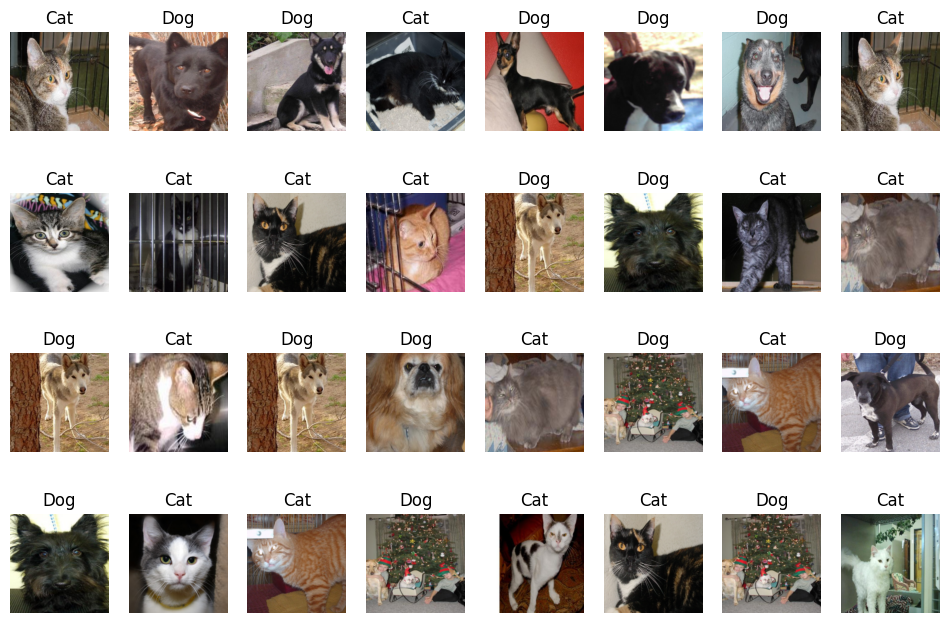

In [43]:
import matplotlib.pyplot as plt

# ImageFolder의 class_to_idx 속성을 사용하여 레이블 맵 생성
labels_map = {v:k for k, v in train_dataset.class_to_idx.items()}

# 이미지 그리드 생성
figure = plt.figure(figsize=(12, 8))
cols, rows = 8, 4

# 이미지 출력
for i in range(1, cols * rows + 1):
    # 랜덤으로 이미지 샘플 선택
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()
    
    # 부도(subplot) 추가
    figure.add_subplot(rows, cols, i)
    
    # 이미지 제목 설정 (레이블 맵 사용)
    plt.title(labels_map[label])
    
    # 축 숨김
    plt.axis("off")
    
    # 이미지 시각화 (RGB 이미지)
    # 원래 이미지 shape은 (3, 300, 300)이므로, (300, 300, 3)으로 변경해야 imshow()에서 올바르게 표시됨
    plt.imshow(torch.permute(img, (1, 2, 0)))

# 그림 출력
plt.show()


In [64]:
# device 설정 (cuda:0 혹은 cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [67]:
from torchvision import models # pretrained 모델을 가져오기 위한 import

# ResNet101 모델 생성
model = models.resnet101(pretrained=True) 
# pretrained=True 로 설정, 
# pretrained=False로 설정되었을 경우 가중치는 가져오지 않습니다.

# models.vgg16(pretrained=True) # VGG16

# models.resnet18(pretrained=True) # ResNet18

# models.inception_v3(pretrained=True) # Inception_V3

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [68]:
# 가중치를 Freeze 하여 학습시 업데이트가 일어나지 않도록 설정합니다.
for param in model.parameters():
    param.requires_grad = False  # 가중치 Freeze

In [69]:
import torch.nn as nn
# Fully-Connected Layer를 Sequential로 생성하여 VGG pretrained 모델의 'Classifier'에 연결합니다.
fc = nn.Sequential(
    nn.Linear(2048, 256), # VGG16 모델의 features의 출력이 7X7, 512장 이기 때문에 in_features=7*7*512 로 설정합니다.
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2), # Cats vs Dogs 이진 분류이기 때문에 2로 out_features=2로 설정합니다.
)

In [70]:
model.fc = fc
model.to(device)
# 모델의 구조도 출력
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [71]:
import torch.optim as optim

In [72]:
# 옵티마이저를 정의합니다. 옵티마이저에는 model.parameters()를 지정해야 합니다.
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# 손실함수(loss function)을 지정합니다. Multi-Class Classification 이기 때문에 CrossEntropy 손실을 지정하였습니다.
loss_fn = nn.CrossEntropyLoss()

In [73]:
from tqdm import tqdm  # Progress Bar 출력

In [74]:
def model_train(model, data_loader, loss_fn, optimizer, device):
    # 모델을 훈련모드로 설정합니다. training mode 일 때 Gradient 가 업데이트 됩니다. 반드시 train()으로 모드 변경을 해야 합니다.
    model.train()

    # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
    running_loss = 0
    corr = 0

    # 예쁘게 Progress Bar를 출력하면서 훈련 상태를 모니터링 하기 위하여 tqdm으로 래핑합니다.
    prograss_bar = tqdm(data_loader)

    # mini-batch 학습을 시작합니다.
    for img, lbl in prograss_bar:
        # image, label 데이터를 device에 올립니다.
        img, lbl = img.to(device), lbl.to(device)

        # 누적 Gradient를 초기화 합니다.
        optimizer.zero_grad()

        # Forward Propagation을 진행하여 결과를 얻습니다.
        output = model(img)

        # 손실함수에 output, label 값을 대입하여 손실을 계산합니다.
        loss = loss_fn(output, lbl)

        # 오차역전파(Back Propagation)을 진행하여 미분 값을 계산합니다.
        loss.backward()

        # 계산된 Gradient를 업데이트 합니다.
        optimizer.step()

        # output의 max(dim=1)은 max probability와 max index를 반환합니다.
        # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
        _, pred = output.max(dim=1)

        # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
        # 합계는 corr 변수에 누적합니다.
        corr += pred.eq(lbl).sum().item()

        # loss 값은 1개 배치의 평균 손실(loss) 입니다. img.size(0)은 배치사이즈(batch size) 입니다.
        # loss 와 img.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
        # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
        running_loss += loss.item() * img.size(0)

    # 누적된 정답수를 전체 개수로 나누어 주면 정확도가 산출됩니다.
    acc = corr / len(data_loader.dataset)

    # 평균 손실(loss)과 정확도를 반환합니다.
    # train_loss, train_acc
    return running_loss / len(data_loader.dataset), acc

In [75]:
def model_evaluate(model, data_loader, loss_fn, device):
    # model.eval()은 모델을 평가모드로 설정을 바꾸어 줍니다.
    # dropout과 같은 layer의 역할 변경을 위하여 evaluation 진행시 꼭 필요한 절차 입니다.
    model.eval()

    # Gradient가 업데이트 되는 것을 방지 하기 위하여 반드시 필요합니다.
    with torch.no_grad():
        # loss와 accuracy 계산을 위한 임시 변수 입니다. 0으로 초기화합니다.
        corr = 0
        running_loss = 0

        # 배치별 evaluation을 진행합니다.
        for img, lbl in data_loader:
            # device에 데이터를 올립니다.
            img, lbl = img.to(device), lbl.to(device)

            # 모델에 Forward Propagation을 하여 결과를 도출합니다.
            output = model(img)

            # output의 max(dim=1)은 max probability와 max index를 반환합니다.
            # max probability는 무시하고, max index는 pred에 저장하여 label 값과 대조하여 정확도를 도출합니다.
            _, pred = output.max(dim=1)

            # pred.eq(lbl).sum() 은 정확히 맞춘 label의 합계를 계산합니다. item()은 tensor에서 값을 추출합니다.
            # 합계는 corr 변수에 누적합니다.
            corr += torch.sum(pred.eq(lbl)).item()

            # loss 값은 1개 배치의 평균 손실(loss) 입니다. img.size(0)은 배치사이즈(batch size) 입니다.
            # loss 와 img.size(0)를 곱하면 1개 배치의 전체 loss가 계산됩니다.
            # 이를 누적한 뒤 Epoch 종료시 전체 데이터셋의 개수로 나누어 평균 loss를 산출합니다.
            running_loss += loss_fn(output, lbl).item() * img.size(0)

        # validation 정확도를 계산합니다.
        # 누적한 정답숫자를 전체 데이터셋의 숫자로 나누어 최종 accuracy를 산출합니다.
        acc = corr / len(data_loader.dataset)

        # 결과를 반환합니다.
        # val_loss, val_acc
        return running_loss / len(data_loader.dataset), acc

In [ ]:
# 최대 Epoch을 지정합니다.
num_epochs = 10
model_name = 'vgg16-pretrained'

min_loss = np.inf

# Epoch 별 훈련 및 검증을 수행합니다.
for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(model, train_loader, loss_fn, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(model, test_loader, loss_fn, device)

    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(model.state_dict(), f'{model_name}.pth')

    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

 44%|████▎     | 273/625 [00:59<01:23,  4.24it/s]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 625/625 [02:13<00:00,  4.68it/s]


[INFO] val_loss has been improved from inf to 0.04159. Saving Model!
epoch 01, loss: 0.08404, acc: 0.96945, val_loss: 0.04159, val_accuracy: 0.98579


 71%|███████   | 443/625 [01:33<00:33,  5.50it/s]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 625/625 [02:11<00:00,  4.75it/s]


In [ ]:
# 모델에 저장한 가중치를 로드합니다.
model.load_state_dict(torch.load(f'{model_name}.pth'))

In [ ]:
# 최종 검증 손실(validation loss)와 검증 정확도(validation accuracy)를 산출합니다.
final_loss, final_acc = model_evaluate(model, test_loader, loss_fn, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')